# **1. Análisis de histograma**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
clef_image = cv2.imread("../images/clef.png", cv2.IMREAD_GRAYSCALE)
muscle_image = cv2.imread("../images/muscle.png", cv2.IMREAD_GRAYSCALE)

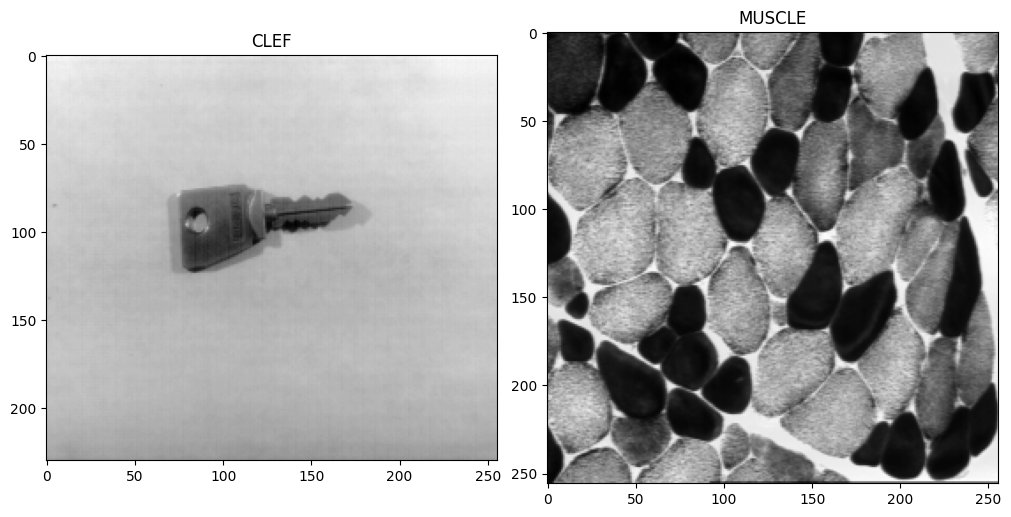

In [4]:
fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(clef_image, cmap = "grey")
ax[0].set_title("CLEF")

ax[1].imshow(muscle_image, cmap = "grey")
ax[1].set_title("MUSCLE")

plt.show()

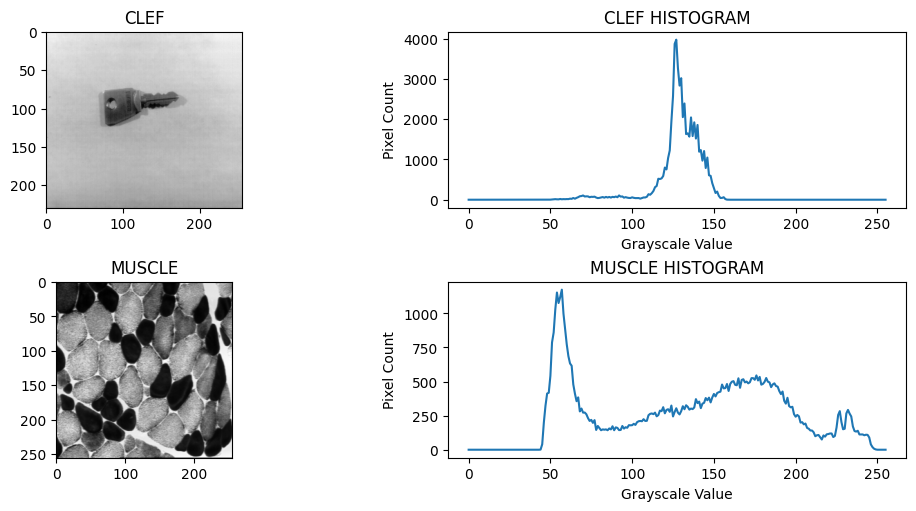

In [5]:
hist_clef = cv2.calcHist([clef_image], [0], None, [256], [0, 256])
hist_muscle = cv2.calcHist([muscle_image], [0], None, [256], [0, 256])

fig, ax = plt.subplots(2, 2, layout = "constrained", figsize = (10, 5))

ax[0,0].imshow(clef_image, cmap = "grey")
ax[0,0].set_title("CLEF")

ax[0,1].plot(hist_clef)
ax[0,1].set_title("CLEF HISTOGRAM")
ax[0,1].set_xlabel("Grayscale Value")
ax[0,1].set_ylabel("Pixel Count")

ax[1,0].imshow(muscle_image, cmap = "grey")
ax[1,0].set_title("MUSCLE")

ax[1,1].plot(hist_muscle)
ax[1,1].set_title("MUSCLE HISTOGRAM")
ax[1,1].set_xlabel("Grayscale Value")
ax[1,1].set_ylabel("Pixel Count")

plt.show()

#### **Explique las formas de cada uno de los histogramas generados.**

El histograma de *muscle.png* presenta varias concentraciones de valores de intensidad, lo que indica que la imagen no es homogénea. Se observa un grupo de intensidades bajas asociado a las fibras musculares oscuras (pico más alto), mientras que las fibras claras y las zonas de separación entre fibras aportan valores intermedios y altos de intensidad (picos bajos pero identificables). Esta distribución amplia y con varios picos refleja la presencia de diferentes estructuras en la imagen y, a su vez, un contraste marcado entre ellas. 

En contraste, el histograma de *clef.png* es mucho más estrecho y concentrado alrededor de un valor medio de intensidad. Esto ocurre porque la mayor parte de la imagen corresponde a un fondo claro bastante uniforme, y el objeto principal ocupa solo una pequeña fracción del área total. Como resultado, la variación de intensidades es reducida y no aparecen múltiples picos relevantes. 

---

#### **Observando únicamente el histograma de muscle.png, ¿cómo se puede determinar cuáles fibras musculares son más densas (ocupan una superficie más grande en la imagen) entre las rojas (oscuras) y las blancas (grises)? Y ¿cuáles fibras tienen un color más uniforme (más homogéneo)?**

Observando únicamente el histograma de *muscle.png*, la densidad relativa de las fibras se puede inferir a partir de la cantidad de píxeles en cada rango de intensidades. Las fibras claras (blancas o grises) generan una región del histograma más extendida, lo que indica que abarcan una mayor cantidad de píxeles y, por lo tanto, ocupan una superficie más grande en la imagen. Las fibras oscuras (rojas) aparecen asociadas a un rango de intensidades más reducido, lo que sugiere que cubren un área menor.

En cuanto a la uniformidad del color, esta se relaciona con qué tan concentrados están los valores de intensidad. Las fibras oscuras presentan un pico más estrecho en el histograma, lo que indica que sus intensidades varían poco y que su apariencia es más homogénea. Por el contrario, las fibras claras muestran una mayor dispersión de valores, lo que sugiere una mayor variación interna de intensidad y, por tanto, menor homogeneidad.

---

# **2. Operaciones aritméticas**

In [6]:
rondelle_image = cv2.imread("../images/rondelle.png", cv2.IMREAD_GRAYSCALE)
spot_image = cv2.imread("../images/spot.png", cv2.IMREAD_GRAYSCALE)

In [7]:
fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(rondelle_image, cmap = "grey")
ax[0].set_title("RONDELLE")

ax[1].imshow(spot_image, cmap = "grey")
ax[1].set_title("SPOT")

plt.show()

In [8]:
rondelle_image = rondelle_image.astype(np.uint16)
spot_image = spot_image.astype(np.uint16)

In [9]:
hist_rondelle = cv2.calcHist([rondelle_image], [0], None, [256], [0, 256])
hist_spot = cv2.calcHist([spot_image], [0], None, [256], [0, 256])

fig, ax = plt.subplots(2, 2, layout = "constrained", figsize = (10, 5))

ax[0,0].imshow(rondelle_image, cmap = "grey")
ax[0,0].set_title("RONDELLE")

ax[0,1].plot(hist_rondelle)
ax[0,1].set_title("RONDELLE HISTOGRAM")
ax[0,1].set_xlabel("Grayscale Value")
ax[0,1].set_ylabel("Pixel Count")

ax[1,0].imshow(spot_image, cmap = "grey")
ax[1,0].set_title("SPOT")

ax[1,1].plot(hist_spot)
ax[1,1].set_title("SPOT HISTOGRAM")
ax[1,1].set_xlabel("Grayscale Value")
ax[1,1].set_ylabel("Pixel Count")

plt.show()

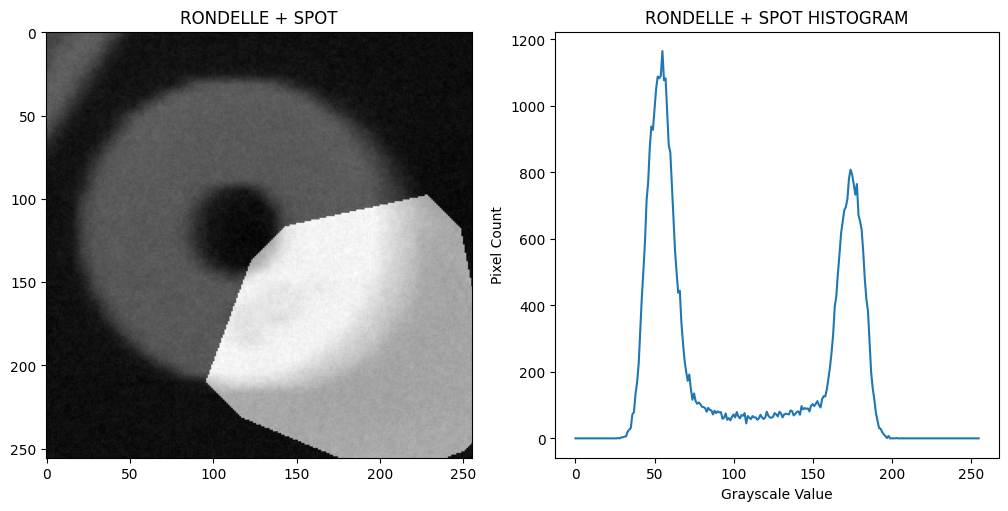

In [10]:
rondelle_plus_spot = cv2.add(rondelle_image, spot_image)

hist_rondelle_plus_spot = cv2.calcHist([rondelle_plus_spot], [0], None, [256], [0, 256])

fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(rondelle_plus_spot, cmap = "gray")
ax[0].set_title("RONDELLE + SPOT")

ax[1].plot(hist_rondelle_plus_spot)
ax[1].set_title("RONDELLE + SPOT HISTOGRAM")
ax[1].set_xlabel("Grayscale Value")
ax[1].set_ylabel("Pixel Count")

plt.show()

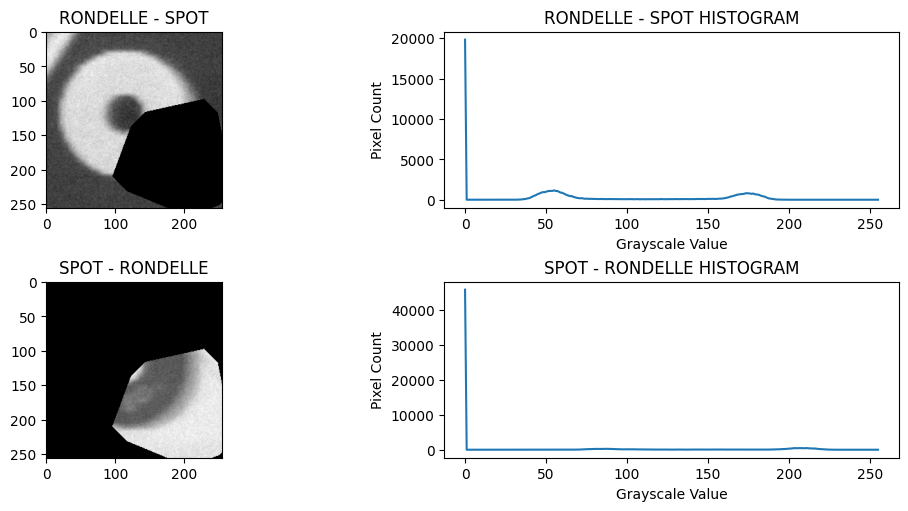

In [11]:
rondelle_subtract_spot = cv2.subtract(rondelle_image, spot_image)
spot_subtract_rondelle = cv2.subtract(spot_image, rondelle_image)

hist_rondelle_subtract_spot = cv2.calcHist([rondelle_subtract_spot], [0], None, [256], [0, 256])
hist_spot_subtract_rondelle = cv2.calcHist([spot_subtract_rondelle], [0], None, [256], [0, 256])

fig, ax = plt.subplots(2, 2, layout = "constrained", figsize = (10, 5))

ax[0,0].imshow(rondelle_subtract_spot, cmap = "grey")
ax[0,0].set_title("RONDELLE - SPOT")

ax[0,1].plot(hist_rondelle_subtract_spot)
ax[0,1].set_title("RONDELLE - SPOT HISTOGRAM")
ax[0,1].set_xlabel("Grayscale Value")
ax[0,1].set_ylabel("Pixel Count")

ax[1,0].imshow(spot_subtract_rondelle, cmap = "grey")
ax[1,0].set_title("SPOT - RONDELLE")

ax[1,1].plot(hist_spot_subtract_rondelle)
ax[1,1].set_title("SPOT - RONDELLE HISTOGRAM")
ax[1,1].set_xlabel("Grayscale Value")
ax[1,1].set_ylabel("Pixel Count")

plt.show()

#### **Explique las formas de cada uno de los histogramas generados.**

El histograma de *rondelle.png* presenta una distribución bimodal, con dos picos bien definidos. Estos picos corresponden a las regiones oscuras del fondo y del centro de la rondela, y a las regiones más claras del anillo principal. La presencia de valores intermedios se debe a transiciones suaves, ruido y variaciones de iluminación dentro de la imagen.

En el caso de *spot.png*, el histograma está fuertemente concentrado en dos extremos, sin pressencia de valores intermedios. Un pico muy alto en intensidades bajas corresponde al fondo negro dominante, mientras que el pico en intensidades altas representa la región clara del objeto poligonal. La ausencia de valores intermedios junto con los dos picos que se pueden observa en el histograma muestran que la imágen es binaria, es decir, solo esta compuesta por dos colores (negro y blanco).

---

#### **Justifique los valores de los niveles de gris de la imsgen resultante al realizar la operación de adición entre las imágenes rondelle.png y spot.png.**

En la imagen resultante de la adición entre *rondelle.png* y *spot.png* se observa que los valores extremos del histograma se reducen. En particular, el negro absoluto prácticamente desaparece, ya que incluso en las regiones donde *spot.png* tiene valor cero, la suma incorpora los niveles de gris de *rondelle.png*, impidiendo que el resultado permanezca completamente negro. De manera similar, el blanco absoluto se ve atenuado, pues las regiones claras de *spot.png* se combinan con intensidades intermedias de *rondelle.png*, evitando una acumulación dominante en el valor máximo.

Como consecuencia, el histograma de la imagen resultante está principalmente dominado por la distribución de intensidades de *rondelle.png*, aunque con picos un poco menores debido a la presencia de colores intermedios, causada por la unión de la información de ambas imágenes. En otras palabras, se produce una redistribución de los niveles de gris, donde se conservan las tendencias principales de *rondelle.png*, pero con variaciones locales producto de la superposición de ambas imágenes durante la operación de suma píxel a píxel.

---

#### **Explique cómo afecta la inversión de los operandos al resultado de la operación de sustracción entre las imagenes rondelle.png y spot.png.**

Cuando se realiza la operación *rondelle − spot*, las regiones donde *spot.png* tiene valores altos se restan de *rondelle.png*, generando zonas oscuras o incluso valores truncados a cero, debido a que los valores altos de *spot.png* corresponden a blanco absoluto, el cual tiene un mayor valor numérico que los tonos intermedios presentes en la otra imágen. Esto explica la aparición de áreas negras bien definidas y un histograma con una gran concentración de píxeles en intensidades bajas. 

En cambio, al invertir los operandos (*spot − rondelle*), la mayoría de los píxeles de spot.png son cero, por lo que al restar rondelle.png se obtienen valores negativos que son recortados o truncados a cero. Como resultado, la imagen queda dominada por regiones negras y solo se conservan valores distintos de cero en zonas donde *spot* es más brillante que *rondelle*. Esto se refleja en un histograma aún más concentrado en el cero, con muy pocos valores distribuidos en intensidades mayores.

---

#### **¿Es posible prever el histograma de la imagen resultante de una operación aritmética conociendo únicamente los histogramas de las imágenes operandos? Justifique su respuesta.**

No es posible prever de manera exacta el histograma resultante conociendo únicamente los histogramas de las imágenes operandos. El histograma describe la frecuencia de los niveles de intensidad, pero no contiene información sobre la distribución espacial de los píxeles ni sobre cómo se alinean las intensidades entre ambas imágenes.

Las operaciones aritméticas se realizan píxel a píxel, por lo que el resultado depende directamente de la correspondencia espacial entre las intensidades de ambas imágenes. Dos imágenes pueden tener histogramas idénticos y producir resultados completamente distintos al operar entre sí, lo que demuestra que el histograma por sí solo no es suficiente para anticipar el resultado de estas operaciones.

---

# **3. Negativo**

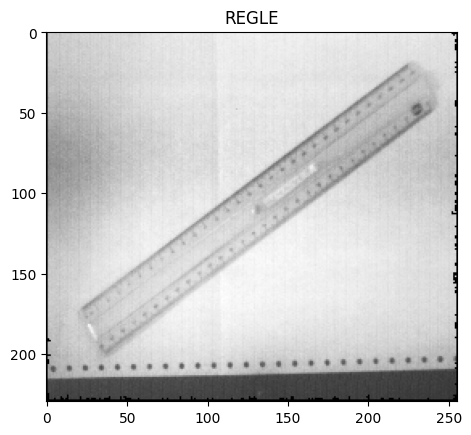

In [12]:
regle_image = cv2.imread("../images/regle.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(regle_image, cmap = "grey")
plt.title("REGLE")

plt.show()

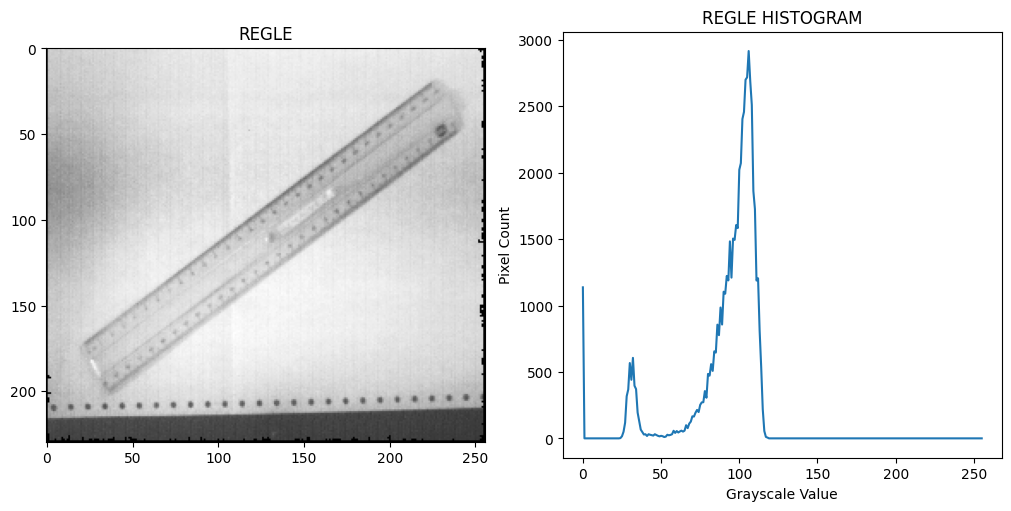

In [13]:
hist_regle = cv2.calcHist([regle_image], [0], None, [256], [0, 256])

fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(regle_image, cmap = "gray")
ax[0].set_title("REGLE")

ax[1].plot(hist_regle)
ax[1].set_title("REGLE HISTOGRAM")
ax[1].set_xlabel("Grayscale Value")
ax[1].set_ylabel("Pixel Count")

plt.show()

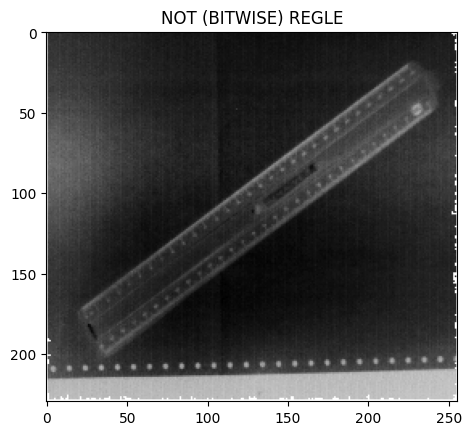

In [14]:
not_regle = cv2.bitwise_not(regle_image)

plt.imshow(not_regle, cmap = "grey")
plt.title("NOT (BITWISE) REGLE")

plt.show()

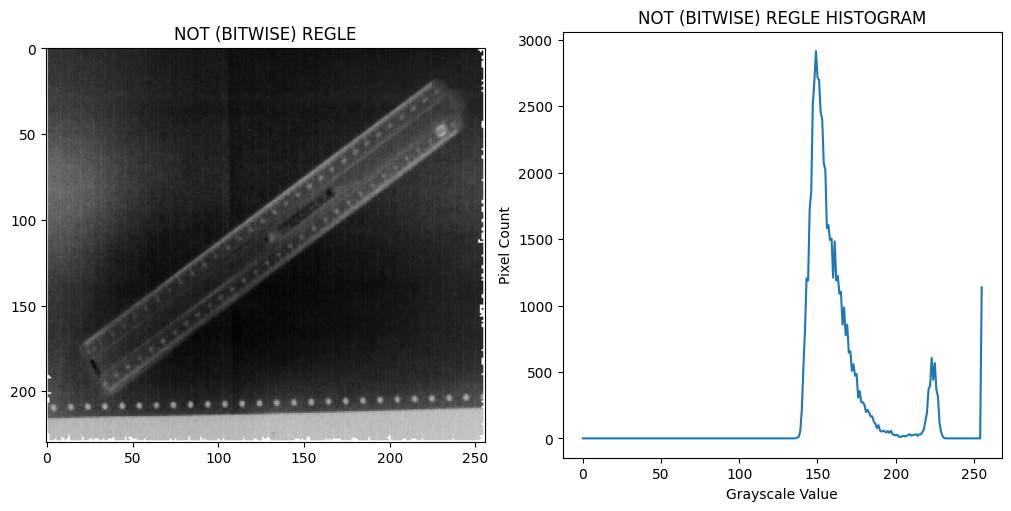

In [15]:
hist_not_regle = cv2.calcHist([not_regle], [0], None, [256], [0, 256])

fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(not_regle, cmap = "gray")
ax[0].set_title("NOT (BITWISE) REGLE")

ax[1].plot(hist_not_regle)
ax[1].set_title("NOT (BITWISE) REGLE HISTOGRAM")
ax[1].set_xlabel("Grayscale Value")
ax[1].set_ylabel("Pixel Count")

plt.show()

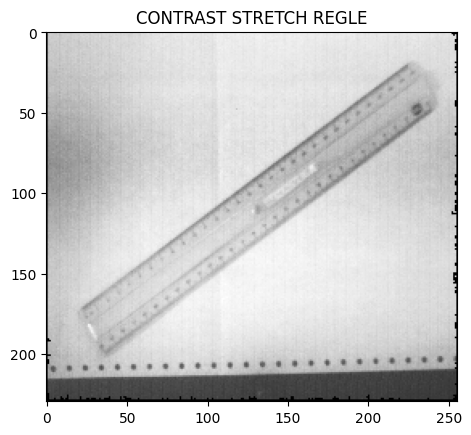

In [16]:
contrast_stretch_image = np.zeros(regle_image.shape, regle_image.dtype)

min_value_expansion, max__value_expansion = 0, 255
min_value_regle, max_value_regle = regle_image.min(), regle_image.max()

height, width = regle_image.shape[:2]

contrast_stretch_image[0: height, 0: width] = (regle_image[0: height, 0: width] - min_value_regle) * ((max__value_expansion - min_value_expansion) / (max_value_regle - min_value_regle)) + min_value_expansion

plt.imshow(contrast_stretch_image, cmap = "grey")
plt.title("CONTRAST STRETCH REGLE")

plt.show()

In [17]:
hist_contrast_stretch_regle = cv2.calcHist([contrast_stretch_image], [0], None, [256], [0, 256])

fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(contrast_stretch_image, cmap = "gray")
ax[0].set_title("CONTRAST STRETCH REGLE")

ax[1].plot(hist_contrast_stretch_regle)
ax[1].set_title("CONTRAST STRETCH REGLE HISTOGRAM")
ax[1].set_xlabel("Grayscale Value")
ax[1].set_ylabel("Pixel Count")

plt.show()

#### **¿Cómo ese la dinámica de la imagen regle.png a partir de su histograma?**

El histograma de la imagen presenta tres picos bien definidos, lo que indica la presencia de tres regiones principales con diferentes niveles de intensidad. El primer pico corresponde a los píxeles oscuros ubicados alrededor de la imagen, que representan el fondo. El segundo pico está asociado a la regla y a la mesa, las cuales comparten tonos de gris intermedios. Finalmente, el tercer pico corresponde a la hoja de papel, que es la región más clara de la imagen. Esta distribución muestra que la imagen tiene una dinámica limitada, ya que los valores de intensidad se concentran en un rango reducido de la escala de grises.

---

#### **¿Cómo es el histograma del negativo de la imagen con respecto al histograma de la imágen original?**

El histograma del negativo se encuentra invertido respecto al histograma de la imagen original, de la misma manera en que la imagen es invertida en la escala de grises. Aunque se conservan los mismos tres picos, su orden cambia: la región correspondiente al papel, que originalmente era la más clara, pasa a ser la menos clara o más oscura, la regla y la mesa se mantienen como un pico intermedio y los píxeles que rodean la imagen, que eran oscuros, se convierten en completamente blancos. Esto refleja que la operación de negativo no altera la cantidad relativa de píxeles, sino únicamente su valor de intensidad. En otras palabras es como si la curva del histograma se proyectara tomando la mitad del eje X (eje de intensidades) como referencia, entonces lo que esta a a la izquierda pasa a la derecha y viceversa.

---

#### **Explique el resultado obtenido tras realizar la expansión de histograma de la imagen regle.png**

Tras aplicar la expansión del histograma, se observa que los valores de intensidad dejan de estar concentrados aproximadamente entre 0 y 124 y pasan a ocupar todo el rango disponible de 0 a 255. Este estiramiento del rango dinámico provoca que las diferencias entre regiones oscuras y claras sean más notorias, haciendo que la imagen se perciba con mayor contraste. El histograma resultante muestra una distribución más extendida, lo que confirma que la expansión redistribuye los niveles de gris sin modificar la estructura de la imagen, pero mejorando su visibilidad.

# **4. Cuantificación**

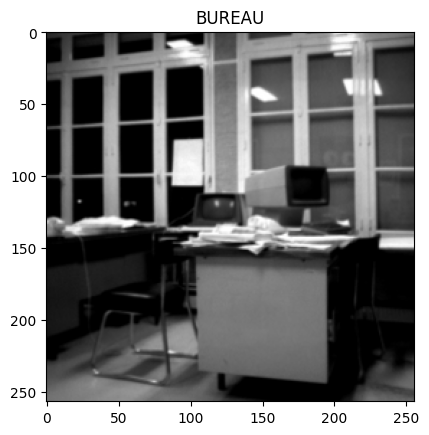

In [18]:
bureau_image = cv2.imread("../images/bureau.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(bureau_image, cmap = "grey")
plt.title("BUREAU")

plt.show()

In [19]:
def bit_plane_slicing(image, k):
	plane = np.full((image.shape[0], image.shape[1]), 2 ** k, np.uint8)
	return cv2.bitwise_and(plane, image)

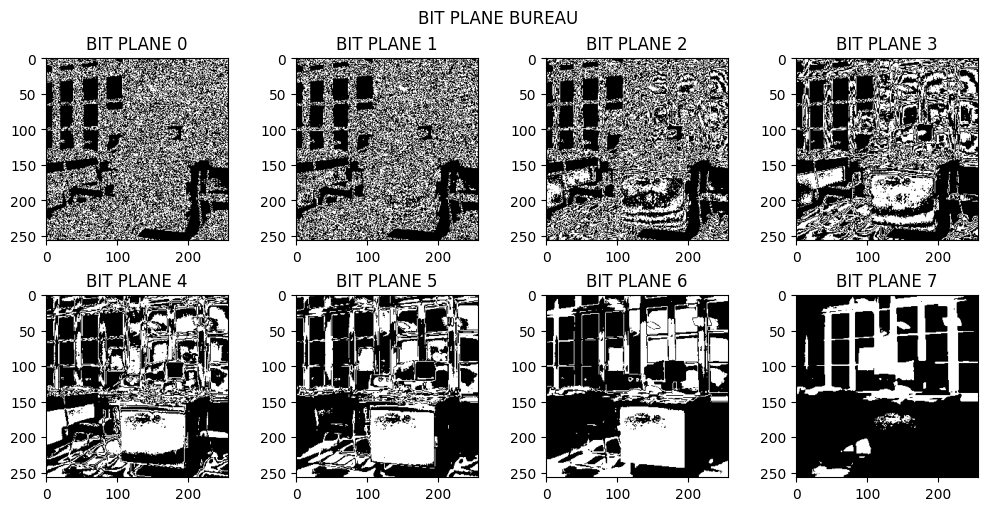

In [20]:
bit_plane_bureau = []

for k in range(8):
    bit_plane_bureau.append(bit_plane_slicing(bureau_image, k))
    
fig, ax = plt.subplots(2, 4, layout = "constrained", figsize = (10, 5))

for k in range(8):
    ax[k // 4, k % 4].imshow(bit_plane_bureau[k], cmap = "gray")
    ax[k // 4, k % 4].set_title(f"BIT PLANE {k}")
    
plt.suptitle("BIT PLANE BUREAU")
plt.show()

In [21]:
def image_quantization(image, k):
    plane = np.full((image.shape[0], image.shape[1]), 255 - 2 ** k, np.uint8)
    return cv2.bitwise_and(plane, image)

In [22]:
def quantize_to_n_bits(image, n_bits):
	
	quantized_image = image.copy()
	bits_to_remove = 8 - n_bits

	for k in range(bits_to_remove):
		quantized_image = image_quantization(quantized_image, k)
	
	return quantized_image

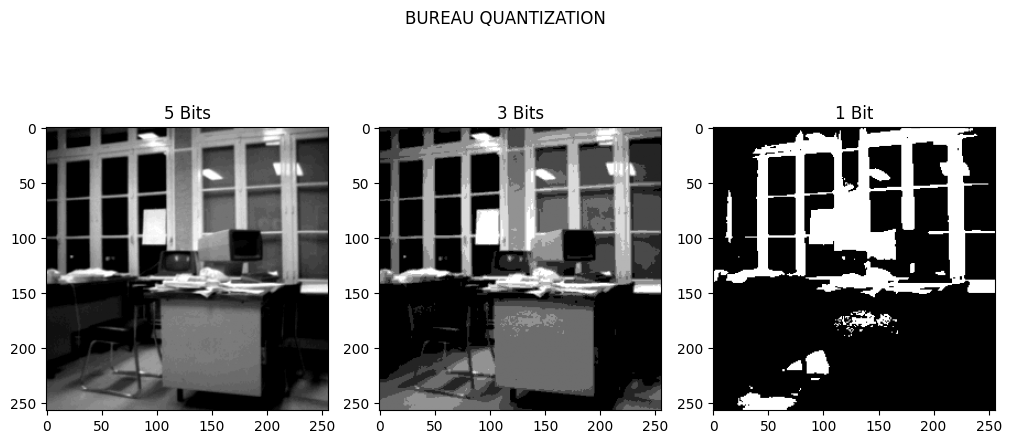

In [23]:
bureau_quantization_5 = quantize_to_n_bits(bureau_image, 5)
bureau_quantization_3 = quantize_to_n_bits(bureau_image, 3)
bureau_quantization_1 = quantize_to_n_bits(bureau_image, 1)

fig,ax = plt.subplots(1, 3, layout = "constrained", figsize = (10, 5))

ax[0].imshow(bureau_quantization_5, cmap = "gray")
ax[0].set_title("5 Bits")

ax[1].imshow(bureau_quantization_3, cmap = "gray")
ax[1].set_title("3 Bits")

ax[2].imshow(bureau_quantization_1, cmap = "gray")
ax[2].set_title("1 Bit")

plt.suptitle("BUREAU QUANTIZATION")
plt.show()

#### **Al visualizar los planos binarios de la imagen ¿Cuál es el plano más significativo y cuál es el menos significativo? ¿Cúal es su conclusión?**

Al observar los planos binarios de la imagen, se nota que los planos correspondientes a los bits más significativos, en particular los bits 5 y 7, son los que conservan la mayor parte de la información visual relevante. En estos planos es posible identificar con claridad las formas principales de la imagen, así como los objetos que la componen y sus contornos. Esto indica que los bits más significativos son los que aportan la estructura global de la imagen.

Por el contrario, los planos asociados a los bits menos significativos contienen muy poca información estructural y están dominados principalmente por ruido. En estos planos no es posible reconocer objetos ni contornos de manera clara. Sin embargo, estos bits cobran sentido cuando se combinan con los planos más significativos, ya que contribuyen a los detalles finos y a las variaciones suaves de intensidad en la imagen final.

---

#### **¿Qué efecto tiene la cuantificación de la imagen al reducirla a 5, 3 y 1 bits? Comente sus conclusiones a partir de las imágenes obtenidas**

Al cuantizar la imagen a 5 bits, únicamente se eliminan los 3 bits menos significativos, por lo que la imagen resultante es, para el ojo humano, muy similar a la imagen original. Aunque se puede perder algo de detalle fino, las formas y los contornos principales se mantienen prácticamente intactos.

Cuando la imagen se cuantiza a 3 bits, se eliminan 5 planos binarios, lo que reduce de manera considerable el número de niveles de gris disponibles. En este caso comienzan a aparecer artefactos visibles, como contornos falsos y regiones con intensidades uniformes, que afectan la percepción de suavidad en la imagen.

Finalmente, al cuantizar la imagen a 1 bit, la información visual se reduce casi por completo, ya que la imagen queda limitada a valores blanco y negro. En esta situación se pierde la mayor parte de la información original y resulta difícil identificar correctamente los objetos y sus contornos, lo que evidencia el impacto severo de una cuantificación extrema.

---

# **5. Operaciones lógicas**

In [24]:
muscle_image = cv2.imread("../images/muscle.png", cv2.IMREAD_GRAYSCALE)
spot_image = cv2.imread("../images/spot.png", cv2.IMREAD_GRAYSCALE)

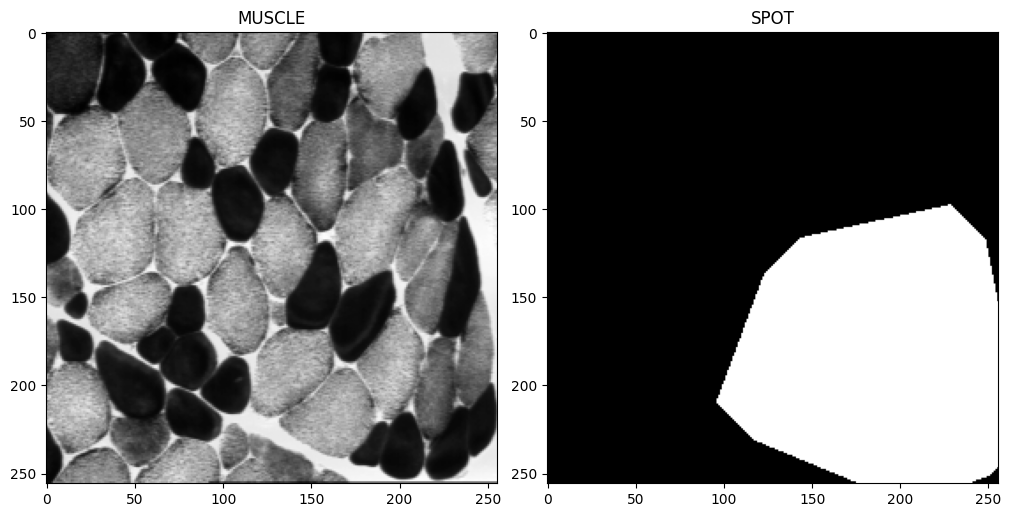

In [25]:
fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(muscle_image, cmap = "grey")
ax[0].set_title("MUSCLE")

ax[1].imshow(spot_image, cmap = "grey")
ax[1].set_title("SPOT")

plt.show()

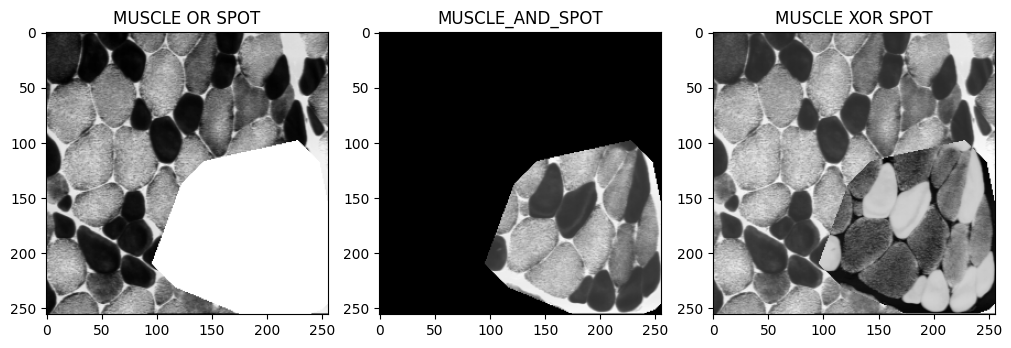

In [26]:
muscle_or_spot = cv2.bitwise_or(muscle_image, spot_image)
muscle_and_spot = cv2.bitwise_and(muscle_image, spot_image)
muscle_xor_spot = cv2.bitwise_xor(muscle_image, spot_image)

fig, ax = plt.subplots(1, 3, layout = "constrained", figsize = (10, 5))

ax[0].imshow(muscle_or_spot, cmap = "grey")
ax[0].set_title("MUSCLE OR SPOT")

ax[1].imshow(muscle_and_spot, cmap = "grey")
ax[1].set_title("MUSCLE_AND_SPOT")

ax[2].imshow(muscle_xor_spot, cmap = "grey")
ax[2].set_title("MUSCLE XOR SPOT")

plt.show()

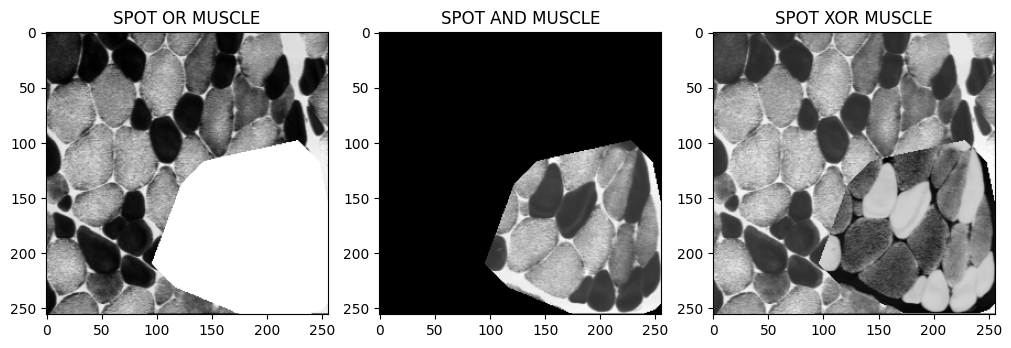

In [27]:
spot_or_muscle = cv2.bitwise_or(spot_image, muscle_image)
spot_and_muscle = cv2.bitwise_and(spot_image, muscle_image)
spot_xor_muscle = cv2.bitwise_xor(spot_image, muscle_image)

fig, ax = plt.subplots(1, 3, layout = "constrained", figsize = (10, 5))

ax[0].imshow(spot_or_muscle, cmap = "grey")
ax[0].set_title("SPOT OR MUSCLE")

ax[1].imshow(spot_and_muscle, cmap = "grey")
ax[1].set_title("SPOT AND MUSCLE")

ax[2].imshow(spot_xor_muscle, cmap = "grey")
ax[2].set_title("SPOT XOR MUSCLE")

plt.show()

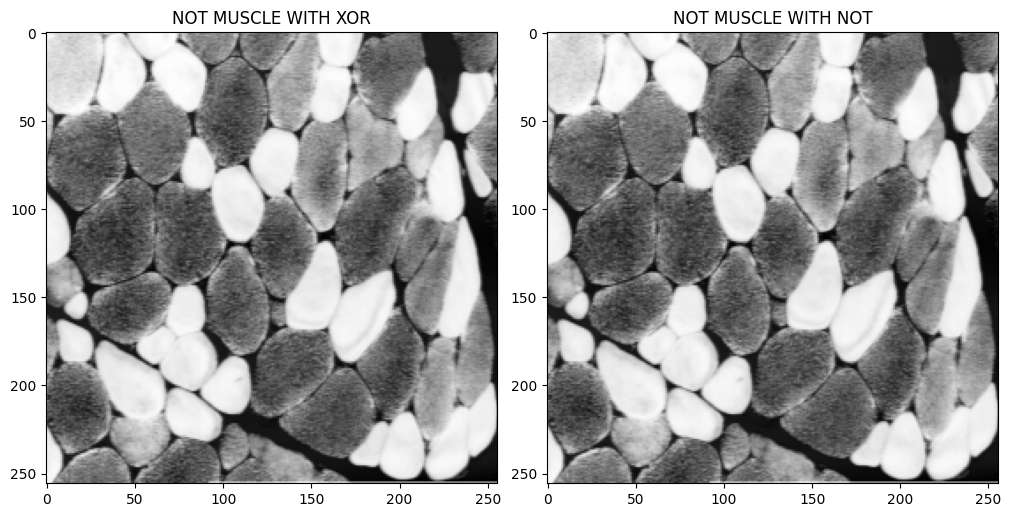

In [28]:
white_image = np.full((muscle_image.shape[0], muscle_image.shape[1]), 255, np.uint8)

not_muscle_xor = cv2.bitwise_xor(white_image, muscle_image)
not_muscle_normal = cv2.bitwise_not(muscle_image)

fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(not_muscle_xor, cmap = "grey")
ax[0].set_title("NOT MUSCLE WITH XOR")

ax[1].imshow(not_muscle_normal, cmap = "grey")
ax[1].set_title("NOT MUSCLE WITH NOT")

plt.show()

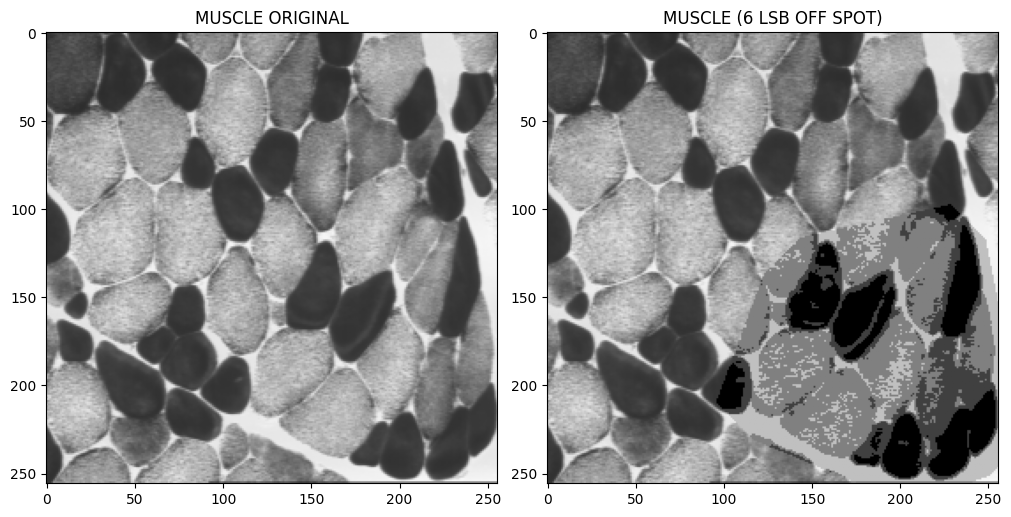

In [29]:
muscle_spot_region = cv2.bitwise_and(muscle_image, spot_image)
quantized_spot_region = quantize_to_n_bits(muscle_spot_region, 2)

muscle_background = cv2.subtract(muscle_image, spot_image)

muscle_quantized_spot = cv2.add(muscle_background, quantized_spot_region)

fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(muscle_image, cmap = "grey", vmin = 0, vmax = 255)
ax[0].set(title = "MUSCLE ORIGINAL")

ax[1].imshow(muscle_quantized_spot, cmap = "grey", vmin = 0, vmax = 255)
ax[1].set(title = "MUSCLE (6 LSB OFF SPOT)")
plt.show()

In [30]:
masked_region = cv2.bitwise_and(muscle_quantized_spot, spot_image)
unique_values = np.unique(masked_region)

print("Unique values in masked zone:", unique_values)

Unique values in masked zone: [  0  64 128 192]


#### **¿Cúal es la conclusión al aplicar las operaciones lógicas OR, AND y XOR entre las imágenes muscle.png y spot.png?**

Al aplicar la operación OR entre *muscle.png* y *spot.png* se observa que esta permite combinar regiones de interés de ambas imágenes, ya que un píxel es distinto de cero si al menos una de las imágenes lo es. Esta operación resulta útil para unir información proveniente de múltiples imágenes o para resaltar zonas marcadas por una máscara. Por su parte, la operación AND permite aislar características específicas, ya que solo conserva los píxeles que son distintos de cero en ambas imágenes, lo cual es especialmente útil para extraer regiones de interés definidas por una máscara. Finalmente, la operación XOR resalta las diferencias entre ambas imágenes, mostrando únicamente las regiones donde los valores de los píxeles no coinciden y marcando como negro absoluto aquellas regiones donde si hay coincidencias. 

---

#### **¿Cómo cambia el resultado al invertir el orden de los operandos en las operaciones OR, AND y XOR entre muscle.png y spot.png? ¿Cúal es su conclusión?**

Al invertir el orden de los operandos en las operaciones OR, AND y XOR, el resultado no cambia. Esto se debe a que estas operaciones lógicas se realizan bit a bit y son conmutativas, es decir, el orden en el que se aplican los operandos no altera el resultado final. Por esta razón, aplicar estas operaciones como muscle OP spot o spot OP muscle produce exactamente la misma imagen resultado.

---

#### **Explique el resultado de aplicar la operación NOT sobre la imagen muscle.png utilizando la operación XOR con una imagen constante de valor 255.**

La operación NOT puede simularse utilizando la operación XOR entre la imagen original y una imagen constante de valor 255, que en representación binaria corresponde a 11111111. Debido a la forma en que funciona el operador XOR, cada bit del píxel original se invierte: si el bit original es 0, al hacer XOR con 1 el resultado es 1, y si el bit original es 1, al hacer XOR con 1 el resultado es 0. Como este proceso se realiza bit a bit para todos los píxeles, el resultado es el negativo de la imagen original, donde las regiones claras se vuelven oscuras y viceversa.

---

#### **Explique cómo poner en cero los 6 bits menos significativos de la zona marcada por spot.png en la imagen muscle.png, sin afectar el resto de la imagen, y justifique por qué la zona resultante solo toma los valores 192, 128, 64 y 0.**

Para poner en cero los seis bits menos significativos únicamente en la zona marcada por spot.png, primero se aplica una operación AND entre *muscle.png* y *spot.png* para extraer exclusivamente la región de interés definida por la máscara blanca. Luego, esta región se cuantiza conservando solo los dos bits más significativos, lo que elimina los detalles finos y restringe los valores posibles. En paralelo, se elimina la región de interés de la imagen original *muscle.png* mediante una operación de resta con *spot.png*, lo que deja dicha zona en negro sin alterar el resto de la imagen. Finalmente, se suma la región cuantizada a la imagen base, obteniendo una imagen final idéntica a la original excepto en la zona marcada.

Los valores resultantes en la región modificada solo pueden ser 192, 128, 64 y 0 porque al conservar únicamente los dos bits más significativos en una imagen de 8 bits, los niveles de gris posibles corresponden a combinaciones de potencias de dos asociadas a esos bits. Esto limita el rango de intensidades a esos cuatro valores discretos.

---

# **6. Interpolación**

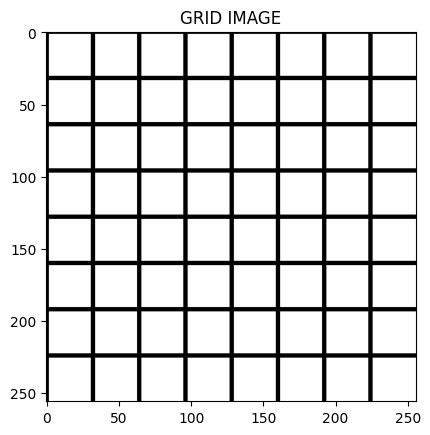

In [31]:
grid_image = np.full((256, 256), 255, dtype = np.uint8)
cell_size = 256 // 8

for i in range(0, 256, cell_size):
    cv2.line(grid_image, (i, 0), (i, 255), 0, 2)
    cv2.line(grid_image, (0, i), (255, i), 0, 2)

plt.imshow(grid_image, cmap = "grey")
plt.title("GRID IMAGE")
plt.show()


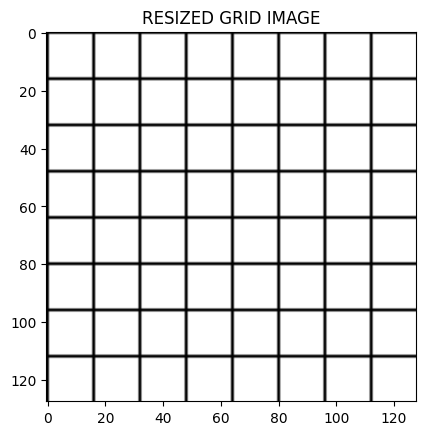

In [32]:
sub_grid_image = cv2.resize(grid_image, (128, 128), interpolation = cv2.INTER_NEAREST)

plt.imshow(sub_grid_image, cmap = "grey")
plt.title("RESIZED GRID IMAGE")
plt.show()

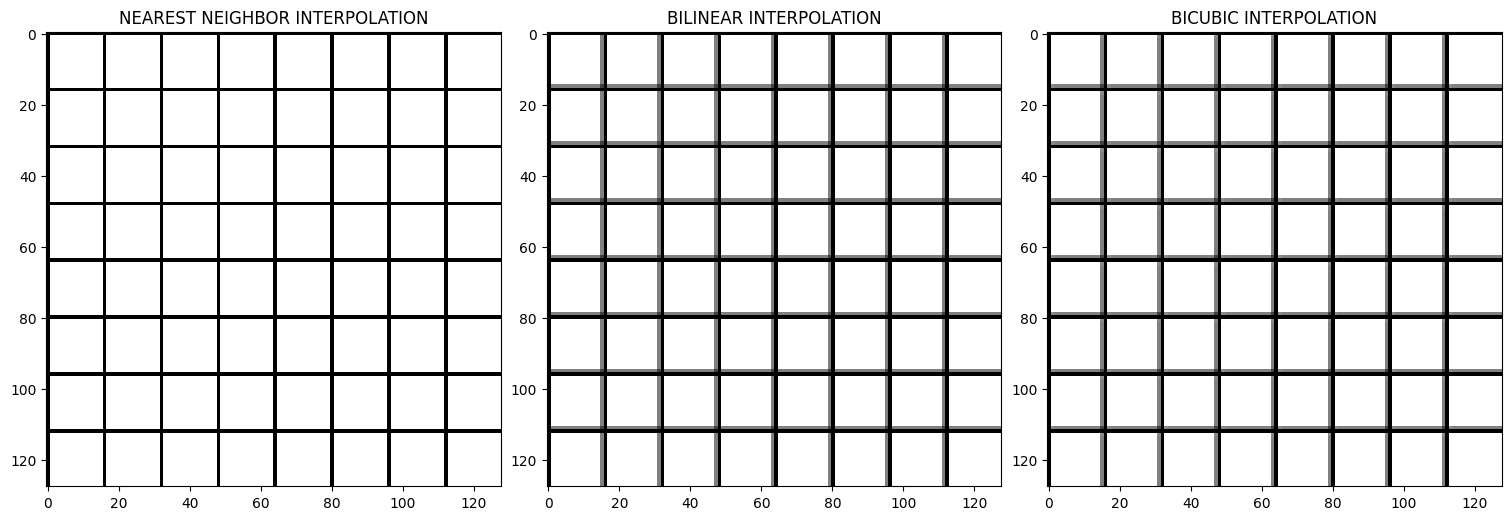

In [33]:
sub_grid_nearest = cv2.resize(grid_image, (128, 128), interpolation = cv2.INTER_NEAREST)
sub_grid_bilinear = cv2.resize(grid_image, (128, 128), interpolation = cv2.INTER_LINEAR)
sub_grid_bicubic = cv2.resize(grid_image, (128, 128), interpolation = cv2.INTER_CUBIC)

fig, ax = plt.subplots(1, 3, layout = "constrained", figsize = (15, 5))

ax[0].imshow(sub_grid_nearest, cmap = "gray")
ax[0].set(title = "NEAREST NEIGHBOR INTERPOLATION")

ax[1].imshow(sub_grid_bilinear, cmap = "gray")
ax[1].set(title = "BILINEAR INTERPOLATION")

ax[2].imshow(sub_grid_bicubic, cmap = "gray")
ax[2].set(title = "BICUBIC INTERPOLATION")

plt.show()

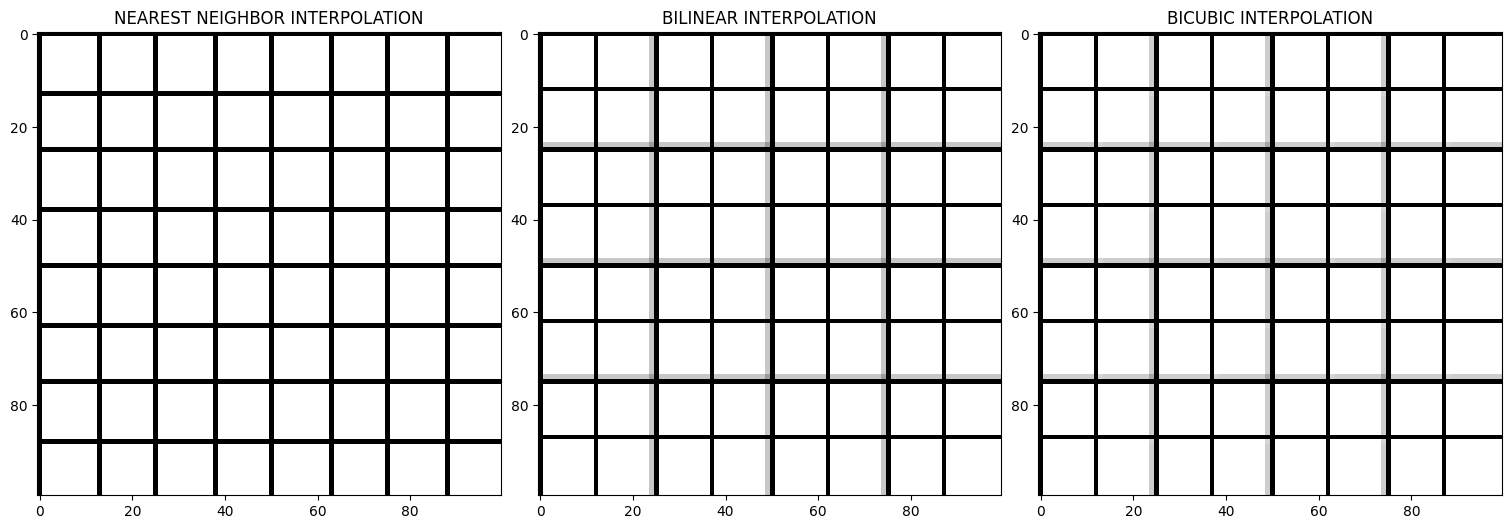

In [34]:
sub_grid_nearest = cv2.resize(grid_image, (100, 100), interpolation = cv2.INTER_NEAREST)
sub_grid_bilinear = cv2.resize(grid_image, (100, 100), interpolation = cv2.INTER_LINEAR)
sub_grid_bicubic = cv2.resize(grid_image, (100, 100), interpolation = cv2.INTER_CUBIC)

fig, ax = plt.subplots(1, 3, layout = "constrained", figsize = (15, 5))

ax[0].imshow(sub_grid_nearest, cmap = "gray")
ax[0].set(title = "NEAREST NEIGHBOR INTERPOLATION")

ax[1].imshow(sub_grid_bilinear, cmap = "gray")
ax[1].set(title = "BILINEAR INTERPOLATION")

ax[2].imshow(sub_grid_bicubic, cmap = "gray")
ax[2].set(title = "BICUBIC INTERPOLATION")

plt.show()

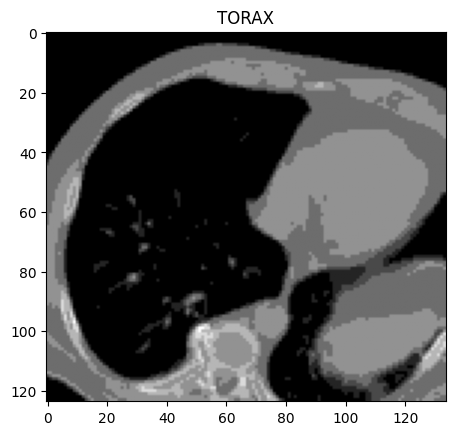

In [35]:
torax_image = cv2.imread("../images/torax.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(torax_image, cmap = "grey")
plt.title("TORAX")
plt.show()

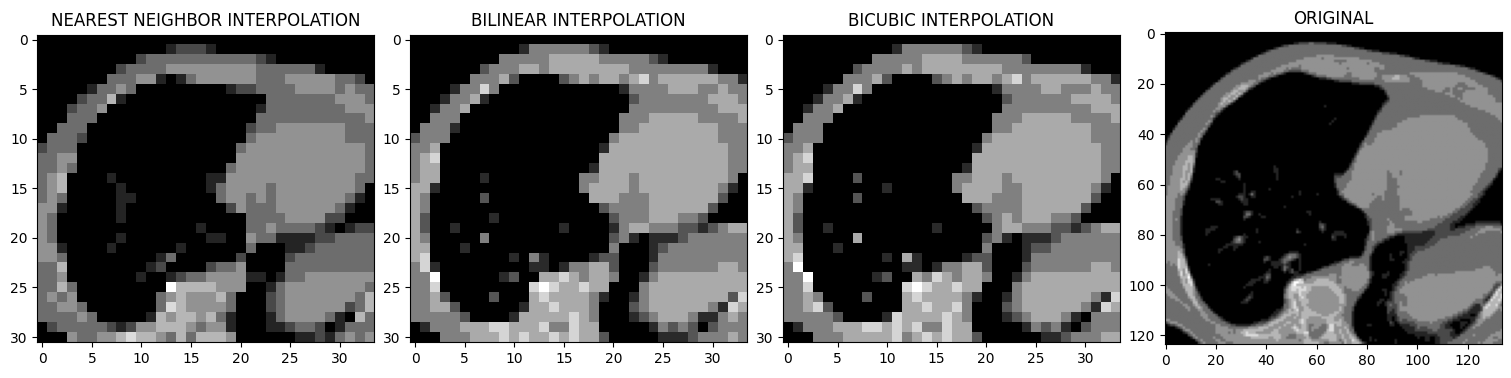

In [36]:
sub_torax_nearest = cv2.resize(torax_image, (34, 31), interpolation = cv2.INTER_NEAREST)
sub_torax_bilinear = cv2.resize(torax_image, (34, 31), interpolation = cv2.INTER_LINEAR)
sub_torax_bicubic = cv2.resize(torax_image, (34, 31), interpolation = cv2.INTER_CUBIC)

fig, ax = plt.subplots(1, 4, layout = "constrained", figsize = (15, 5))

ax[0].imshow(sub_torax_nearest, cmap = "gray")
ax[0].set(title = "NEAREST NEIGHBOR INTERPOLATION")

ax[1].imshow(sub_torax_bilinear, cmap = "gray")
ax[1].set(title = "BILINEAR INTERPOLATION")

ax[2].imshow(sub_torax_bicubic, cmap = "gray")
ax[2].set(title = "BICUBIC INTERPOLATION")

ax[3].imshow(torax_image, cmap = "grey")
ax[3].set_title("ORIGINAL")

plt.show()

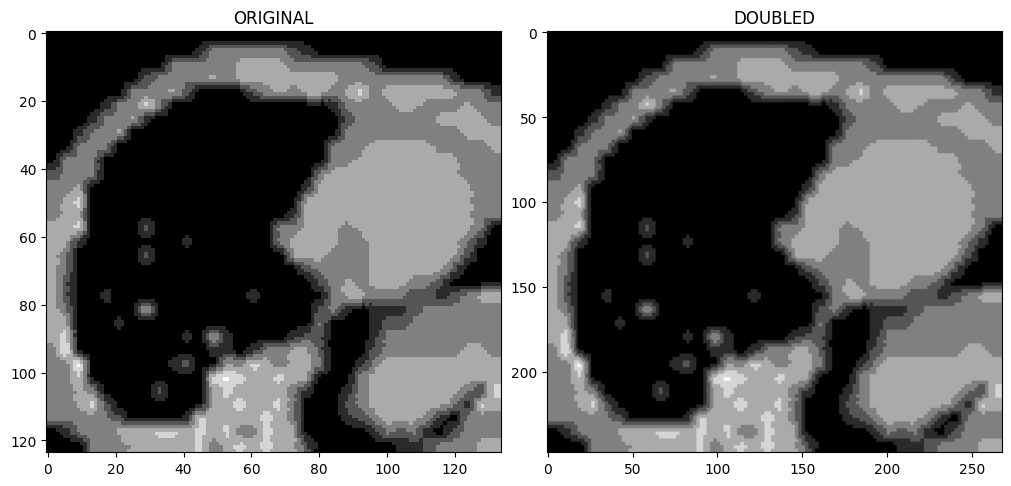

In [37]:
original_torax_bicubic = cv2.resize(sub_torax_bicubic, (134, 124))
torax_doubled = cv2.resize(original_torax_bicubic, (134 * 2, 124 * 2))

fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(original_torax_bicubic, cmap = "grey")
ax[0].set_title("ORIGINAL")

ax[1].imshow(torax_doubled, cmap = "grey")
ax[1].set_title("DOUBLED")

plt.show()

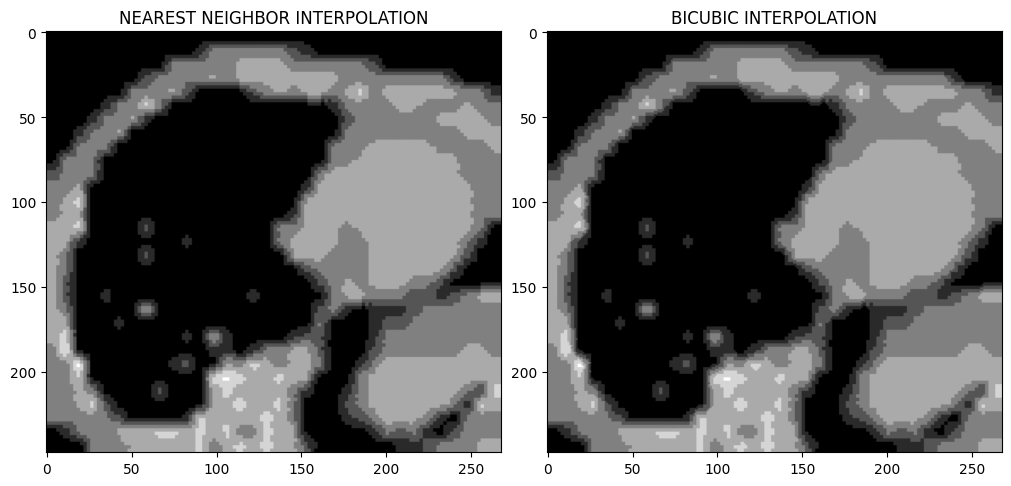

In [38]:
torax_nn_doubled = cv2.resize(original_torax_bicubic, (134 * 2, 124 * 2), interpolation = cv2.INTER_NEAREST)
torax_cubic_doubled = cv2.resize(original_torax_bicubic, (134 * 2, 124 * 2), interpolation = cv2.INTER_CUBIC)

fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(torax_nn_doubled, cmap = "grey")
ax[0].set_title("NEAREST NEIGHBOR INTERPOLATION")

ax[1].imshow(torax_cubic_doubled,cmap="gray")
ax[1].set_title("BICUBIC INTERPOLATION")

plt.show()

#### **Al submuestrear la imagen a 128x128, ¿Cúal es la nueva resolución de la imagen (tamaño del píxel) y cómo se explica este efecto?**

Teniendo en cuenta que la imagen original tiene una resolución de 256×256 y se submuestrea a 128×128, el factor de escala es 128/256 = 0.5. Si se asume que el tamaño del píxel original es de 1×1 (en unidades arbitrarias), al conservar el tamaño físico de la imagen y reducir su resolución, el tamaño del píxel pasa a ser de 2×2. Esto significa que cada píxel de la imagen submuestreada representa un área mayor de la imagen original. Este efecto se explica porque, al disminuir la resolución espacial, se reduce la cantidad de píxeles disponibles para representar la misma área física, lo que conlleva una pérdida de detalle y, por tanto, una disminución en la calidad visual.

---

#### **¿Qué efecto producen las diferentes técnicas de interpolación (incluyendo Nearest Neighbor) en la imagen submuestreada? Comente el resultado a partir de la apariencia de la imagen y los niveles de gris, e investigue en qué consiste cada técnica.**

Al observar las imágenes resultantes, el cambio más evidente se presenta en la transición entre las líneas negras y los espacios blancos. Con Nearest Neighbor, cada píxel toma el valor del píxel más cercano, lo que produce transiciones abruptas entre negro y blanco, sin niveles intermedios de gris. En la interpolación bilineal se consideran los cuatro píxeles más cercanos, lo que genera valores intermedios y permite observar la aparición de tonos grises, suavizando ligeramente las transiciones. Por último, la interpolación cúbica considera dieciséis píxeles vecinos, lo que da como resultado transiciones mucho más suaves y una imagen visualmente más detallada, con gradientes de gris mejor distribuidos y menos cambios bruscos.

---

#### **¿Qué diferencias se observan al submuestrear la imagen original a 100x100 utilizando los diferentes interpoladores, en comparación con los resultados obtenidos anteriormente?**

En el caso de Nearest Neighbor, al submuestrear la imagen a 100×100 se evidencia que las líneas negras se vuelven más gruesas. Esto ocurre porque cada píxel ahora debe cubrir un área aún mayor para conservar el tamaño físico de la imagen. Para las técnicas de interpolación bilineal y cúbica, se observa que algunas transiciones en escala de grises se pierden o se reducen considerablemente. Esto se debe a que la reducción de resolución es más severa que en el caso anterior, lo que implica una mayor pérdida de información y detalle, incluso al usar métodos de interpolación más avanzados.

---

#### **Al submuestrear la imagen de trabajo a dimensiones 34x31, ¿qué diferencias se observan entre la imagen original y la imagen resultado al cambiar el interpolador? ¿Cuáles son sus conclusiones?**

Al realizar el submuestreo a 34×31, la imagen resultante se percibe notablemente más pixelada. Este efecto es consecuencia directa de la reducción drástica de la resolución, ya que cada píxel debe representar una porción mucho mayor de la imagen original. En este escenario, el tipo de interpolación juega un papel importante: Nearest Neighbor ofrece la peor calidad visual, pues solo asigna el valor del píxel más cercano y provoca una pérdida significativa de tonos intermedios. En contraste, las interpolaciones bilineal y bicúbica producen resultados más suaves, ya que utilizan información de múltiples píxeles vecinos, conservando mejor los niveles de gris y reduciendo la apariencia abrupta de los contornos.

---

#### **Al remuestrear la imagen duplicando su número de filas y columnas, ¿cuál es la nueva resolución de la imagen (tamaño del píxel) y cómo se explica este efecto? Compare las técnicas de interpolación Nearest Neighbor y Cubic B-spline, haciendo énfasis en el efecto observado en los contornos. ¿Cuáles son sus conclusiones?**

Al duplicar el número de filas y columnas de la imagen original de 134×124 a 268×248, la resolución espacial aumenta y, al conservar el tamaño físico de la imagen, el tamaño del píxel se reduce a la mitad. Esto ocurre porque ahora se dispone de más píxeles para representar la misma área, por lo que cada píxel cubre una región menor. Como resultado, la imagen se percibe más suave y con mayor continuidad visual.

En la comparación entre Nearest Neighbor y Cubic B-spline, se observa que la interpolación cúbica produce transiciones de gris mucho más graduales, especialmente en los contornos de las diferentes regiones. Esto se debe a que Cubic B-spline utiliza un modelo matemático más complejo basado en polinomios cúbicos, lo que evita cambios abruptos de intensidad. En contraste, Nearest Neighbor genera bordes más duros y escalonados, ya que no introduce valores intermedios. En conclusión, la interpolación cúbica ofrece una mejor calidad visual, especialmente en regiones con bordes y gradientes, mientras que Nearest Neighbor prioriza simplicidad computacional a costa de calidad.

---

# **7. Modificación de la paleta de colores**

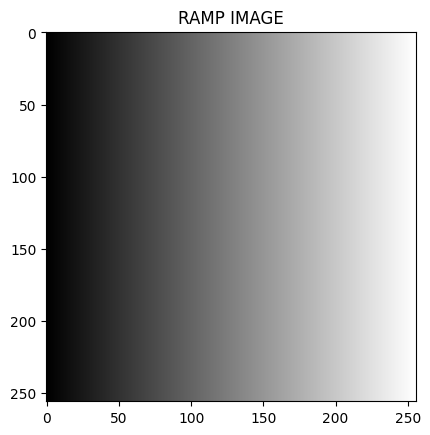

In [39]:
width, height = 256, 256

ramp_image = np.zeros((256, 256), dtype = np.uint8)

for i in range(width):
    ramp_image[:, i] = i

plt.imshow(ramp_image, cmap = "grey")
plt.title("RAMP IMAGE")
plt.show()

In [40]:
aquitain_image = cv2.imread("../images/aquitain.png", cv2.IMREAD_GRAYSCALE)
scanner_image = cv2.imread("../images/scanner.png", cv2.IMREAD_GRAYSCALE)

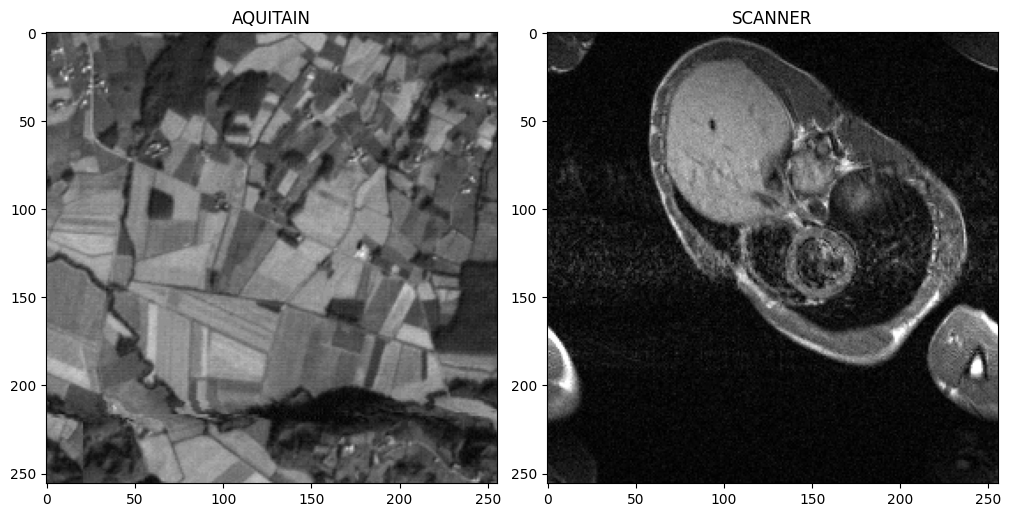

In [41]:
fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(aquitain_image, cmap = "grey")
ax[0].set_title("AQUITAIN")

ax[1].imshow(scanner_image, cmap = "grey")
ax[1].set_title("SCANNER")

plt.show()

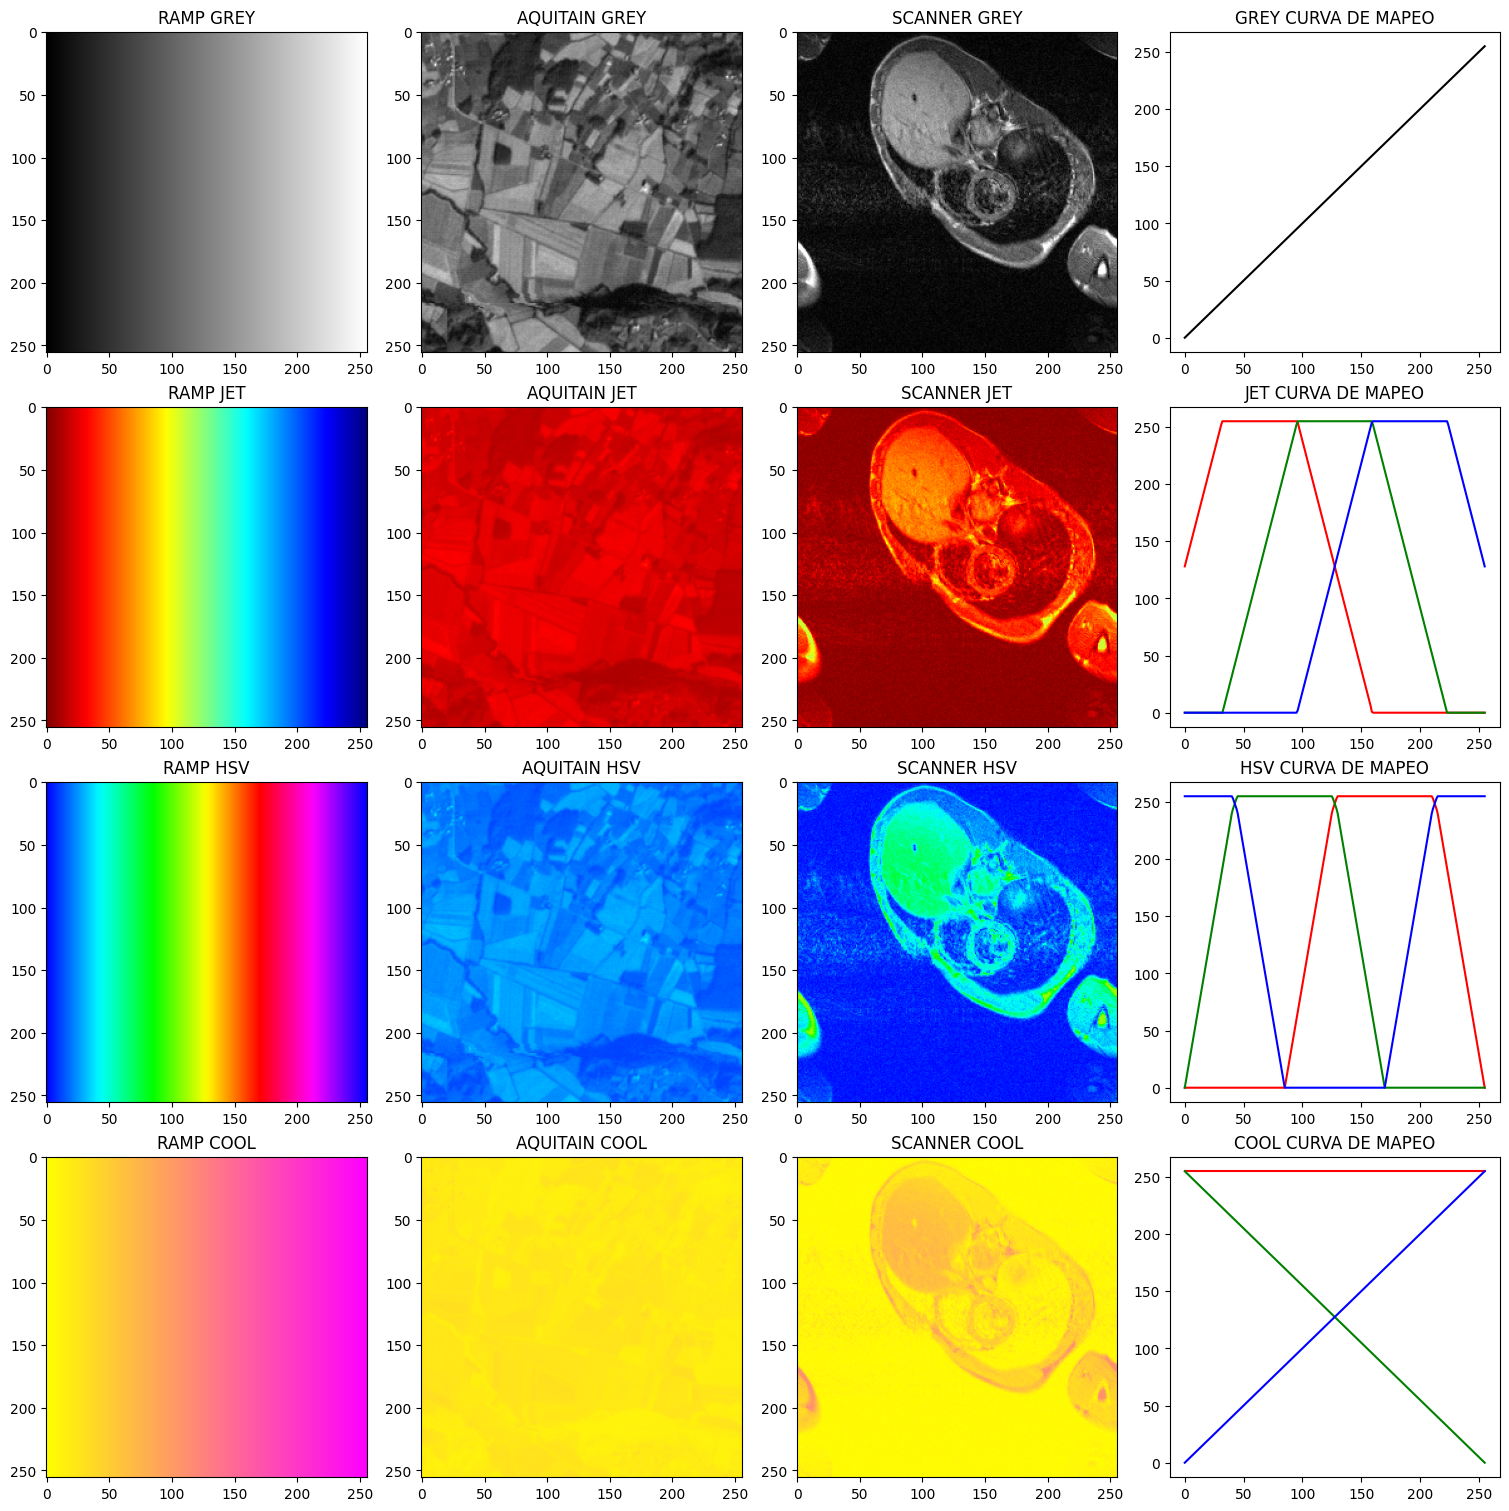

In [42]:
ramp_jet = cv2.applyColorMap(ramp_image, cv2.COLORMAP_JET)
aquitain_jet = cv2.applyColorMap(aquitain_image, cv2.COLORMAP_JET)
scanner_jet = cv2.applyColorMap(scanner_image, cv2.COLORMAP_JET)
colors_jet = ramp_jet[0, :, :]

ramp_hsv = cv2.applyColorMap(ramp_image, cv2.COLORMAP_HSV)
aquitain_hsv = cv2.applyColorMap(aquitain_image, cv2.COLORMAP_HSV)
scanner_hsv = cv2.applyColorMap(scanner_image, cv2.COLORMAP_HSV)
colors_hsv = ramp_hsv[0, :, :]

ramp_cool = cv2.applyColorMap(ramp_image, cv2.COLORMAP_COOL)
aquitain_cool = cv2.applyColorMap(aquitain_image, cv2.COLORMAP_COOL)
scanner_cool = cv2.applyColorMap(scanner_image, cv2.COLORMAP_COOL)
colors_cool = ramp_cool[0, :, :]

ramp_grey = ramp_image
aquitain_grey = aquitain_image
scanner_grey = scanner_image
colors_grey = ramp_image[0, :]

fig, ax = plt.subplots(4, 4, layout="constrained", figsize=(15, 15))
intensity = np.arange(256)

ax[0,0].imshow(ramp_grey, cmap = "grey")
ax[0,0].set_title("RAMP GREY")

ax[0,1].imshow(aquitain_grey, cmap = "grey")
ax[0,1].set_title("AQUITAIN GREY")

ax[0,2].imshow(scanner_grey, cmap = "grey")
ax[0,2].set_title("SCANNER GREY")

ax[0,3].plot(intensity, colors_grey, "k")
ax[0,3].set_title("GREY CURVA DE MAPEO")

ax[1,0].imshow(ramp_jet)
ax[1,0].set_title("RAMP JET")

ax[1,1].imshow(aquitain_jet)
ax[1,1].set_title("AQUITAIN JET")

ax[1,2].imshow(scanner_jet)
ax[1,2].set_title("SCANNER JET")

ax[1,3].plot(intensity, colors_jet[:,0], "r")
ax[1,3].plot(intensity, colors_jet[:,1], "g")
ax[1,3].plot(intensity, colors_jet[:,2], "b")
ax[1,3].set_title("JET CURVA DE MAPEO")

ax[2,0].imshow(ramp_hsv)
ax[2,0].set_title("RAMP HSV")

ax[2,1].imshow(aquitain_hsv)
ax[2,1].set_title("AQUITAIN HSV")

ax[2,2].imshow(scanner_hsv)
ax[2,2].set_title("SCANNER HSV")

ax[2,3].plot(intensity, colors_hsv[:,0], "r")
ax[2,3].plot(intensity, colors_hsv[:,1], "g")
ax[2,3].plot(intensity, colors_hsv[:,2], "b")
ax[2,3].set_title("HSV CURVA DE MAPEO")

ax[3,0].imshow(ramp_cool)
ax[3,0].set_title("RAMP COOL")

ax[3,1].imshow(aquitain_cool)
ax[3,1].set_title("AQUITAIN COOL")

ax[3,2].imshow(scanner_cool)
ax[3,2].set_title("SCANNER COOL")

ax[3,3].plot(intensity, colors_cool[:,0], "r")
ax[3,3].plot(intensity, colors_cool[:,1], "g")
ax[3,3].plot(intensity, colors_cool[:,2], "b")
ax[3,3].set_title("COOL CURVA DE MAPEO")

plt.show()


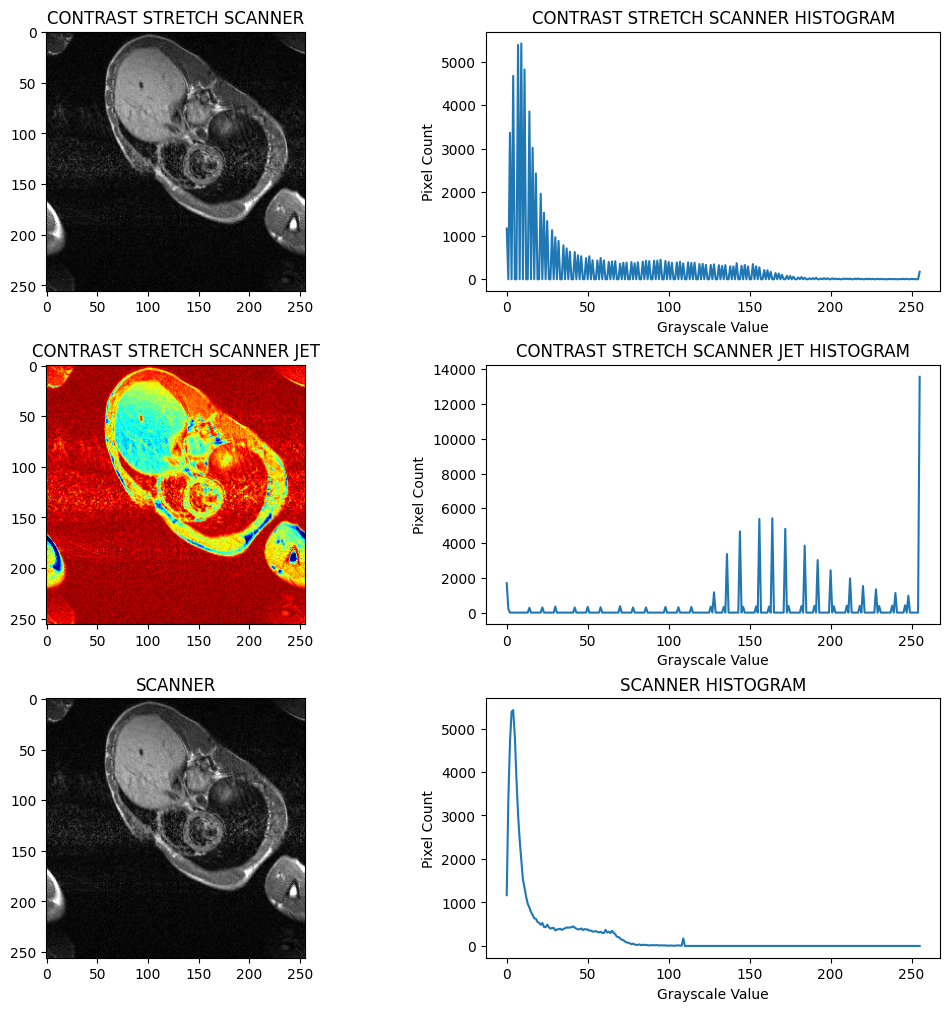

In [43]:
contrast_stretch_scanner = np.zeros(scanner_image.shape, scanner_image.dtype)

min_value_expansion, max_value_expansion = 0, 255
min_value_scanner, max_value_scanner = scanner_image.min(), scanner_image.max()

height, width = scanner_image.shape

contrast_stretch_scanner[0:height, 0:width] = ((scanner_image[0:height, 0:width] - min_value_scanner) * ((max_value_expansion - min_value_expansion) / (max_value_scanner - min_value_scanner)) + min_value_expansion)
hist_constrast_stretch_scanner = cv2.calcHist([contrast_stretch_scanner], [0], None, [256], [0, 256])

contrast_stretch_scanner_jet = cv2.applyColorMap(contrast_stretch_scanner, cv2.COLORMAP_JET)
hist_contrast_stretch_scanner_jet = cv2.calcHist([contrast_stretch_scanner_jet], [0], None, [256], [0,256])

hist_scanner = cv2.calcHist([scanner_image], [0], None, [256], [0, 256])

fig, ax = plt.subplots(3, 2, layout = "constrained", figsize = (10, 10))

ax[0,0].imshow(contrast_stretch_scanner, cmap = "grey")
ax[0,0].set_title("CONTRAST STRETCH SCANNER")

ax[0,1].plot(hist_constrast_stretch_scanner)
ax[0,1].set_title("CONTRAST STRETCH SCANNER HISTOGRAM")
ax[0,1].set_xlabel("Grayscale Value")
ax[0,1].set_ylabel("Pixel Count")

ax[1,0].imshow(contrast_stretch_scanner_jet)
ax[1,0].set_title("CONTRAST STRETCH SCANNER JET")
ax[1,1].plot(hist_contrast_stretch_scanner_jet)
ax[1,1].set_title("CONTRAST STRETCH SCANNER JET HISTOGRAM")
ax[1,1].set_xlabel("Grayscale Value")
ax[1,1].set_ylabel("Pixel Count")

ax[2,0].imshow(scanner_image, cmap = "grey")
ax[2,0].set_title("SCANNER")
ax[2,1].plot(hist_scanner)
ax[2,1].set_title("SCANNER HISTOGRAM")
ax[2,1].set_xlabel("Grayscale Value")
ax[2,1].set_ylabel("Pixel Count")

plt.show()

#### **Al aplicar una paleta de colores a las imágenes generadas (rampa y las de trabajo), ¿cuáles son sus observaciones sobre la distribución de colores y las curvas?**

Al aplicar las paletas de colores a las imágenes generadas, especialmente a la imagen rampa, se puede observar cómo se asignan los colores a los valores de intensidad de la imagen. En las imágenes mayormente en blanco y negro, los valores extremos de intensidad (negro y blanco) se mapean a los extremos de la paleta de colores. Esto permite visualizar de manera más intuitiva cómo se distribuyen los tonos a lo largo de la imagen y cómo las curvas de la paleta afectan la percepción visual de las intensidades. Las transiciones de la rampa muestran de forma continua el paso de un color a otro, facilitando la comprensión de cómo cada paleta transforma los valores originales de la imagen.

---

#### **Tras realizar una expansión lineal del contraste en scanner.png, ¿cómo se observa la imagen resultante y su histograma?**

Al aplicar la expansión lineal del contraste (contrast stretch) a *scanner.png*, la imagen resultante presenta tonos más contrastados. Las zonas más oscuras se hacen más visibles y las áreas claras se intensifican, generando un mayor rango dinámico. Esto se refleja en el histograma: se observa que los valores de intensidad se extienden a lo largo de todo el rango posible, produciendo subidas y bajadas más marcadas, mientras que el histograma de la imagen original es más concentrado y no presenta este patrón. En conjunto, el contraste aumentado facilita la distinción de detalles que en la imagen original eran más difíciles de percibir.

---

#### **Al aplicar la misma paleta de colores a la imagen expandida de scanner.png, ¿cuál es el resultado en la imagen y su histograma?**

Al aplicar una paleta de colores, como JET, a la imagen previamente expandida, la información visual se resalta de manera más clara. Los elementos que antes estaban en escala de grises ahora se representan con colores distintos, haciendo más fácil la identificación de patrones y detalles. En el histograma, se nota un cambio en la distribución de los valores: los picos se desplazan hacia los colores correspondientes a los valores más altos, mientras que se mantiene la variabilidad de los tonos generada por el contrast stretch, reflejando picos fluctuantes a lo largo de la gráfica. Esto evidencia cómo la combinación de paleta de colores y expansión de contraste mejora la percepción visual de los elementos en la imagen.

---

#### **Compare y comente la imagen original con la imagen expandida en términos de apariencia e histograma.**

Comparando la imagen original con la expandida, se observa que la imagen expandida tiene un contraste notablemente mayor. Los tonos oscuros se profundizan y los claros se acentúan, lo que permite distinguir mejor los detalles presentes. El histograma refleja este cambio: en la imagen original, la distribución de intensidades es más concentrada y homogénea, mientras que en la imagen expandida se presentan subidas y bajadas pronunciadas a lo largo del rango de valores, debido a la redistribución de las intensidades tras el contrast stretch. Esta operación facilita la percepción de detalles que en la imagen original podían pasar desapercibidos.

---

#### **Compare y comente la imagen original con la imagen expandida a la que se le aplicó la paleta de colores, en términos de apariencia e histograma.**

Al comparar la imagen original con la imagen expandida y coloreada, se nota un cambio visual significativo. La imagen original, en escala de grises, se transforma en una imagen coloreada (por ejemplo, usando la paleta JET), lo que permite diferenciar elementos con mayor claridad. La aplicación del contrast stretch, junto con la paleta de colores, resalta detalles y patrones que antes eran menos evidentes. En el histograma, se aprecia que el pico de valores más altos, que antes estaba concentrado en intensidades bajas (oscuras), ahora se encuentra en los colores correspondientes a las intensidades más altas (por ejemplo, rojos), y se mantienen los picos fluctuantes debido a la expansión de contraste. Esto evidencia que la combinación de ambas técnicas no solo mejora la apariencia sino también la comprensión visual de la información contenida en la imagen.

---

# **8. Ejercicio de síntesis**

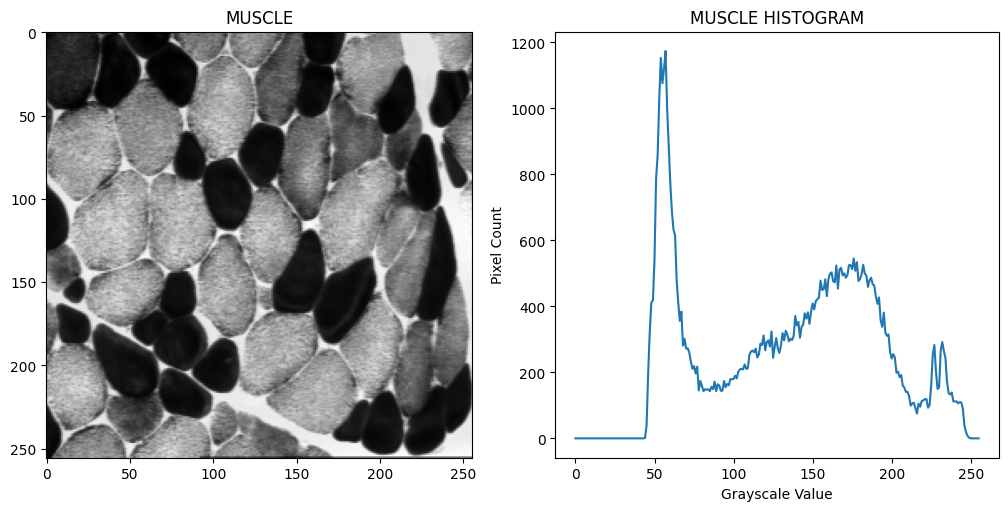

In [44]:
muscle_image = cv2.imread("../images/muscle.png", cv2.IMREAD_GRAYSCALE)
hist_muscle = cv2.calcHist([muscle_image], [0], None, [256], [0, 256])

fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(muscle_image, cmap = "grey")
ax[0].set_title("MUSCLE")

ax[1].plot(hist_muscle)
ax[1].set_title("MUSCLE HISTOGRAM")
ax[1].set_xlabel("Grayscale Value")
ax[1].set_ylabel("Pixel Count")

plt.show()


In [45]:
lower_bound = 40
upper_bound = 87

mask = cv2.inRange(muscle_image, lower_bound, upper_bound)
masked_image = cv2.bitwise_and(muscle_image, muscle_image, mask = mask)

fig, ax = plt.subplots(1, 3, layout = "constrained", figsize = (10, 5))

ax[0].imshow(mask, cmap = "grey")
ax[0].set_title("BINARY MASK")

ax[1].imshow(masked_image, cmap = "grey")
ax[1].set_title("IMAGE WITH FIBERS ISOLATED")

ax[2].imshow(muscle_image, cmap = "grey")
ax[2].set_title("MUSCLE")

plt.show()

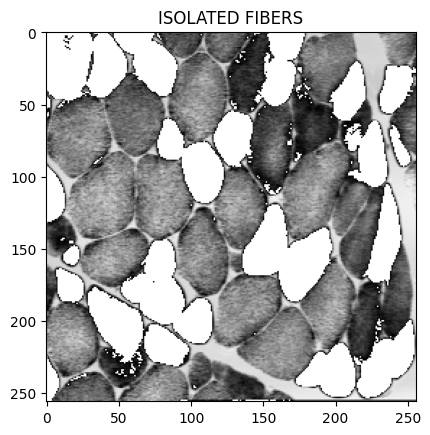

In [46]:
muscle_or_mask = cv2.bitwise_or(muscle_image, mask)

plt.imshow(muscle_or_mask, cmap = "grey")
plt.title("ISOLATED FIBERS")

plt.show()

#### **Explique paso a paso cómo se colorearon de blanco las fibras rojas en la imagen muscle.png, asegurándose de que el resto de la imagen quedara inalterado.**

El proceso para resaltar las fibras rojas en blanco se realizó de la siguiente manera: primero se analizó el histograma de la imagen para identificar el rango de intensidades correspondiente a las fibras oscuras, encontrándose que se ubicaban entre 40 y 87. Con esta información, se creó una máscara binaria en la que los píxeles dentro de ese rango de intensidad tomaban el valor máximo (blanco extremo) y los demás píxeles eran negros. Esta máscara se generó usando la función inRange sobre la imagen original. Posteriormente, se aplicó la máscara a la imagen mediante una operación AND para mantener únicamente las fibras de interés en blanco, y finalmente se combinó el resultado con la imagen original usando un OR, logrando que las fibras seleccionadas quedaran resaltadas en blanco sin alterar el resto de la imagen.

---

# **9. Ejercicio de bono**

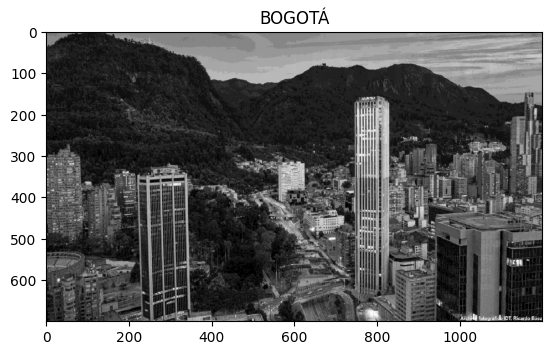

In [47]:
city_image = cv2.imread("../images/imagen_bogota.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(city_image, cmap = "grey")
plt.title("BOGOTÁ")

plt.show()

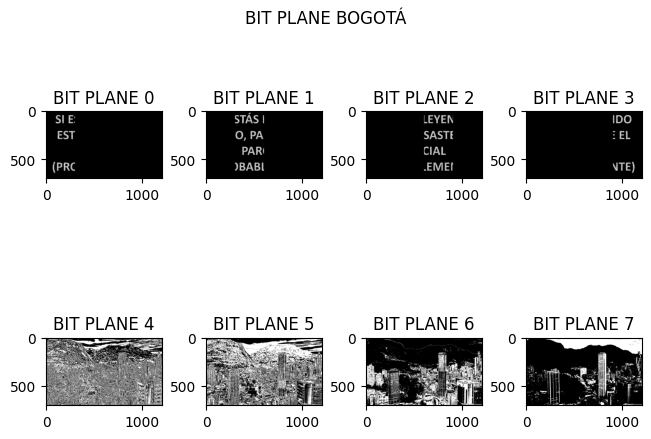

In [48]:
bit_plane_city = []

for k in range(8):
    bit_plane_city.append(bit_plane_slicing(city_image, k))
    
fig, ax = plt.subplots(2, 4, layout = "constrained")

for k in range(8):
    ax[k // 4, k % 4].imshow(bit_plane_city[k], cmap = "grey")
    ax[k // 4, k % 4].set_title(f"BIT PLANE {k}")
    
plt.suptitle("BIT PLANE BOGOTÁ")
plt.show()

In [49]:
for k in range (4, 8):
    city_image = image_quantization(city_image, k)
    
plt.imshow(city_image, cmap = "grey")
plt.title("SECRET MESSAGE")

plt.show()